<a href="https://colab.research.google.com/github/dacardonave/COVID-19/blob/master/Analisis_Comparativo_Metodos_de_Regresion_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis comparativo de los metodos de regresion 
## Analitica de datos
#### Daniel Cardona Velasquez
#### Universidad Nacional De Colombia



A continuacion presentaremos un analisis comparativo de algunos metodos de regresion ya implementados por algunas librerias en python para el entrenamiento de un modelo predictivo. En este caso en particualar, trabajaremos en una base de datos sobre el Covd-19, previamente filtrada y depurada para su entrenamiento y analisis en colombia.

In [20]:
#Importando algunas librerias de tratamiento y representacion
#Cargando el dataset sobre el que vamos a trabajar
#!pip install wget
#import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#datos covid19 - mundo
url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"

#datos Colombia
#url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"

#wget.download(url, 'covid.csv')
Xd = pd.read_csv(url)
Xd.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25


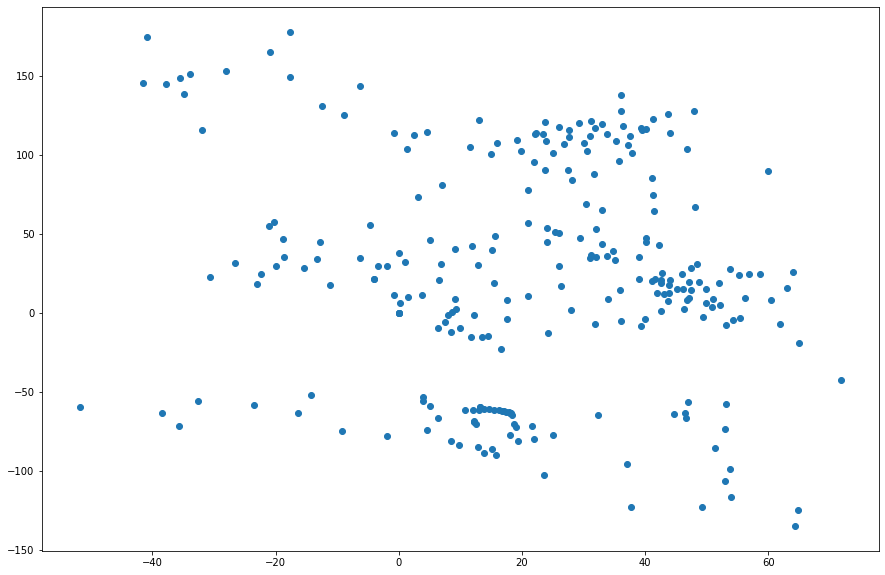

In [21]:
#Distribucion de los datos
plt.scatter(Xd['Lat'],Xd['Long'])

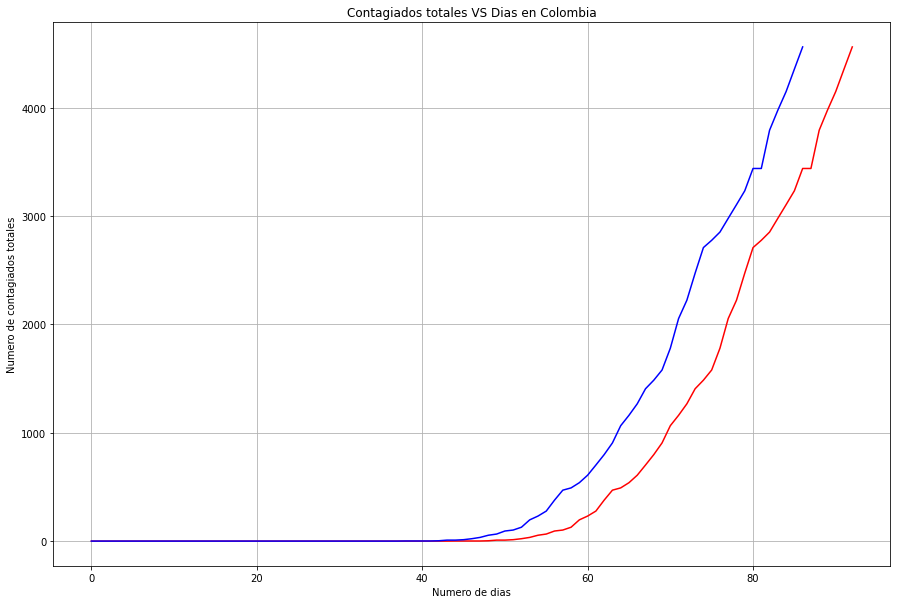

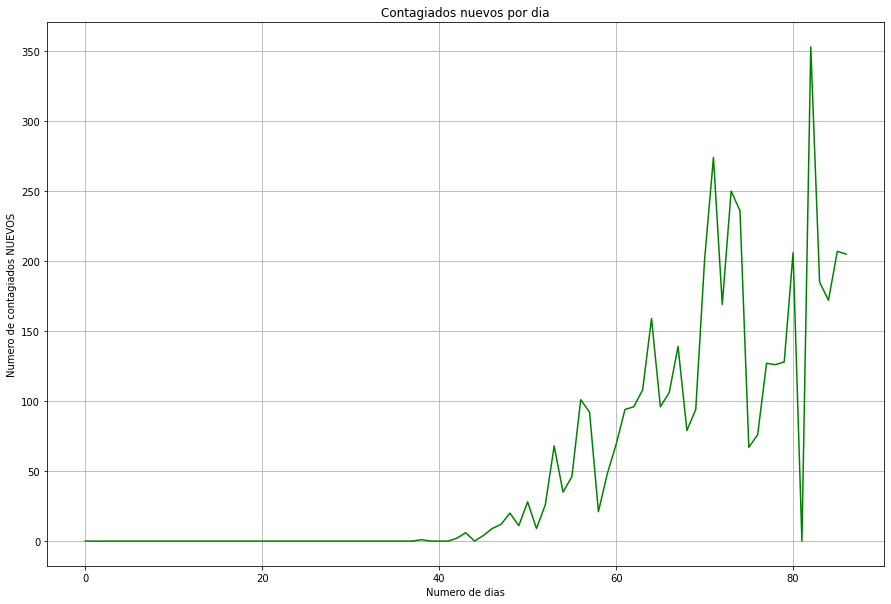

In [22]:
#funcion ventaneo --> esta funcion crea una ventana de w dias
def covid_win(serie,w=5):
    pi =0
    pf = w
    X = serie[pi:pf].reshape(1,-1)
    y = serie[pf+1].reshape(1,-1)
    pi += 1
    pf+= 1
    while pf+1 < serie.shape[0]:
      X = np.append(X,serie[pi:pf].reshape(1,-1),axis=0)
      y = np.append(y,serie[pf+1].reshape(1,-1),axis=0)
      pi += 1
      pf+=1
    return X, y # X \in Real^{N x P = w}, y \in Real^N


ii = Xd[Xd.columns[1]] == 'Colombia'
#print(np.where(ii)[0][0])
#contagios  acumulados
serie = np.array(Xd.iloc[np.where(ii)[0][0],4:])
#numero contagiados por dia
serie_d = np.append(0,np.diff(serie))
#serie_d = np.append(0,np.cumsum(np.diff(serie)))
X,y = covid_win(serie,w=5)
X_d,y_d = covid_win(serie_d,w=5)

plt.plot(serie,'r')
plt.plot(y,'b')
plt.xlabel("Numero de dias")
plt.ylabel("Numero de contagiados totales")
plt.title("Contagiados totales VS Dias en Colombia")
plt.grid()
plt.show()
plt.plot(y_d,'g')
plt.title("Contagiados nuevos por dia")
plt.xlabel("Numero de dias")
plt.ylabel("Numero de contagiados NUEVOS")
plt.grid()



A continuacion haremos todo el proceso de entrenamiento y validacion de 5 regresores para determinar cual de ellos sigue de forma mas apropiada los datos (Linea azul y roja de los graficos anteriores)

# Entrenamiento de regresor para covid 19 - Colombia
# Análisis exploratorio - visualización en 2D PCA
# Validación cruzada y anidada (pocos datos)

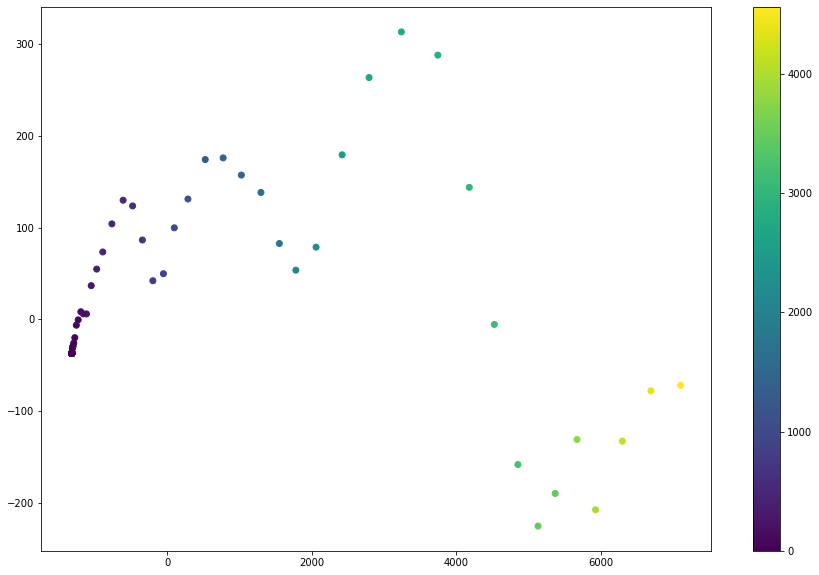

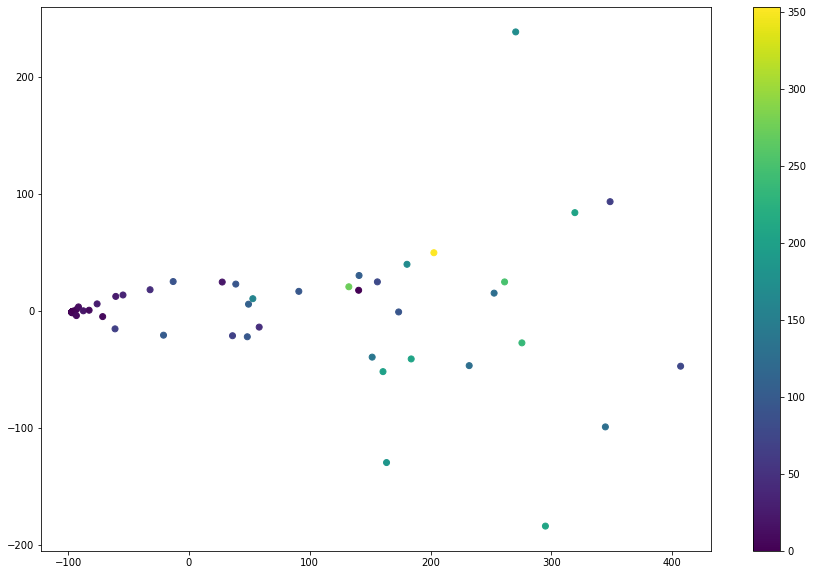

In [23]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

red = PCA(n_components = 3)
red_d = PCA(n_components = 3)

z = red.fit_transform(X)
z_d = red.fit_transform(X_d)

plt.scatter(z[:,0],z[:,1],c=y)
plt.colorbar()
plt.show()


plt.scatter(z_d[:,0],z_d[:,1],c=y_d)
plt.colorbar()
plt.show()


$$w^* = (\Phi^\top \Phi + \lambda I)^{-1}\Phi^\top y $$

$$y_n = \phi_n w^*$$


$\lambda$: hyperparameter

$\Phi(x)=\mathcal{N}(x|\mu,\sigma^2)$

$\mu,\sigma$ hyperparameters

$w$: model's parameter

In [34]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
#pocos datos y mucha incertidumbre, validación cruzada anidada

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(60, 5)
(27, 5)


In [0]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from joblib import dump, load
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

steps = [
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', LinearRegression())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', Ridge())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', Lasso())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', ElasticNet())], 
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', KernelRidge(kernel = 'rbf'))], #clasificador 
         
         ]        


#parametros a buscar por busqueda por grilla
parameters =[
             {'reg__fit_intercept':[0.5,1,1.5,2,2.5,3],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

             {'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'reg__fit_intercept':[0.5,1,1.5,2,2.5,3],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

              {'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

             {'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'reg__l1_ratio':[5e-3,5e-2,5e-1,5,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

             {'reg__gamma':[1e-3,1e-2,1e-1,1,10,100],
             'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },
              ]

label_model = ['NorSC-PCA-LM', 'NorSC-PCA-LMRidge', 'NoSC-PCA-LMLasso', 'NorSC-PCA-LMEN', 'NorSC-PCA-KRRBF']


In [27]:
#valildacion cruzada anidada
Niter = 10 #numero particiones outter loop nested cross-validation
maev =np.zeros((Niter,len(steps)))#arreglo para guardar acierto
best_estimators = []#mejor metodo por iteracion
###clave del funcionamiento
best_hyperpar = []#mejor metodo por iteracion 
#############################
          

for j in range(Niter): #outter loop
      print('it %d/%d'%(j+1,Niter))
      #particiono datos outter loop
      X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) # xtrain 60, xtest 26
      for r in range(len(steps)): #recorro todos los posibles modelos a probar en iteracion j del outter loop
          grid_search = GridSearchCV(Pipeline(steps[r]), parameters[r],cv=5,verbose=10,scoring='neg_mean_absolute_error',n_jobs=5) #cv inner loop
          #xtrain gridsearchcv xtrain split en 12 / cv, 60/5 = 12, xtrain 48 datos validar 12
          # cv = N -> leave one out N <30
          #generar mejor modelo
          grid_search.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_test)
          #guardar mejor modelo
          best_estimators.append(grid_search.best_estimator_)
          best_hyperpar.append(grid_search.best_params_)
          
          #guardar acierto
          maev[j,r] = mae(y_test,y_pred)
          print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r,len(steps)))
          print(best_hyperpar)
          print('mae:',maev[j,r])

          savedata = {
              'acc':maev,
              'best_models':best_estimators,
              'best_hyperpar':best_hyperpar,
                } 
          dump(savedata,'covid19_1.joblib')

print("\nMejor Modelo:\n")
print(grid_search.best_estimator_)

print("\nMejores parámetros:\n")
print(grid_search.best_params_)

it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1703s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0466s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  45 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0636s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  79 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0896s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 171 out of 180 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    2.5s finished
[Parallel(n_jobs=5)

it 1/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 51.49349236672838
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1709s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1884s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0090s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  

it 1/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 51.613066606565546
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0897s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0144s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s


it 1/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}]
mae: 51.500903075966505
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0390s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1039s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1489s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Paralle

it 1/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}]
mae: 54.07481392525097
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0824s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0108s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0108s.) Setting batch_si

it 1/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}]
mae: 35.604695269163805
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0739s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0924s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 111 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 134 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 163 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished


it 2/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 38.3187312030088
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0093s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0415s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0837s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1324s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1781s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Don

it 2/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 38.41946030816235
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0134s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0525s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0684s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1258s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0101s.) Setting batch_size=2.
[Parallel(n_jobs=

it 2/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}]
mae: 38.32504349944408
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1320s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0084s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_job

it 2/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}]
mae: 42.15654608408887
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0753s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1400s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0068s.) Setting batch_s

it 2/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}]
mae: 32.07004836688019
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0745s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0999s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 125 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 141 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 163 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0109s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0392s.)

it 3/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 38.664677659211605
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1408s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1533s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 930 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0103s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  

it 3/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 38.67262327802129
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0917s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0093s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0607s.) Setting batch_size=4.


it 3/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}]
mae: 38.66542403878364
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1331s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0891s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1703s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished


it 3/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}]
mae: 39.23137942690742
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0097s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0501s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0736s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0979s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | ela

it 3/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}]
mae: 19.436029679814965
it 4/10
Fitting 5 folds f

[Parallel(n_jobs=5)]: Batch computation too fast (0.0901s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1218s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0089s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0401s.) Setting batch_size=4.


it 4/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0886s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0642s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_job

it 4/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0591s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1103s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0128s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0578s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computatio

it 4/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1613s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1913s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0091s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  

it 4/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0889s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1466s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jo

it 4/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done  27 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1532s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 114 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 171 out of 180 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 5/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0086s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0086s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0428s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1044s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1860s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 178 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 354 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 706 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 913 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 981 tasks   

it 5/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0425s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0498s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1139s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0117s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0440s.) Setting batch_size=4.
[Parallel(n_jobs=

it 5/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0648s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished


it 5/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0114s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0498s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0761s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1309s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | ela

it 5/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0315s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0838s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1051s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 122 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 146 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.5s finished


it 6/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0222s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0390s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0728s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1346s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1409s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Don

it 6/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0378s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0968s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1239s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0155s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0479s.) Setting batch_size=4.
[Parallel(n_jobs=

it 6/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0821s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1376s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1960s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.00

it 6/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0955s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1704s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jo

it 6/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0629s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1014s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0895s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0092s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computatio

it 7/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0454s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1001s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1576s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent wo

it 7/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0473s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0727s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1670s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0130s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0502s.) Setting batch_size=4.
[Parallel(n_jobs=

it 7/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1415s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.2000s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 930 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0105s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  

it 7/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0602s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1060s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1432s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1480s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 930 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    

it 7/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0688s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1625s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 133 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 142 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 153 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 164 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0099s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0

it 8/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0635s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1322s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0148s.) Setting batch_s

it 8/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0492s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0623s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1038s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0173s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computatio

it 8/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1600s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0100s.) Setting batch_size=2.


it 8/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0710s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1153s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1328s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1931s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 840 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.4

it 8/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0929s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1414s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0110s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 9/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0629s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0645s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 238 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1960s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1791s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 470 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 806 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 945 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 991 tasks      | elapsed:    3.2s

it 9/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1162s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1226s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0149s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0372s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s


it 9/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0868s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1017s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0151s.) Setting batch_si

it 9/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0883s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0988s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_job

it 9/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0788s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1004s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  86 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 130 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 162 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0095s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 10/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components':

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0539s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0759s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1523s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)

it 10/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components':

[Parallel(n_jobs=5)]: Batch computation too fast (0.0508s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0659s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1373s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 122 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0090s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0619s.) Setting batch_size=4.
[Parallel(n_jobs=

it 10/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components':

[Parallel(n_jobs=5)]: Batch computation too fast (0.0953s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1162s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1537s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished


it 10/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components':

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0168s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0168s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0536s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1543s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1646s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 178 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 354 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 706 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Don

it 10/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components':

[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.7s finished


Por Niter de outter loop tengo valores de los hyperparameters

$$\gamma = [0.01,0.1,10,1000,10000,0.01]$$

$$\gamma = [0.01,0.01,0.01,0.1,1,0.01]$$

$$\gamma^* = moda/mediana(\gamma_i) = 0.01$$

Toma todos los datos los N = 85, entreno sobre todo el conjunto con los parametros encontrados utilizando validación cruzada anidad

$$\theta^*/w^* =f(X|\gamma^*)$$

$$ y_{new} = f(x_{new}|\gamma^*,\theta^*/w^*)$$

Despues de la validacion cruzada anidada, vemos que el GridSerch nos da la seleccion de el mejor modelo y los mejores parametros para este modelo que son capaces de seguir nuestros datos de manera mas optima.

En este caso el Mejor modelo queda guardado en "grid_search.best_estimator_" y los mejores parametros para este en "grid_search.best_params_". 

El modelo seleccionado por GridSearch fue un Kernel Ridge con mapeo rbf y los mejores parametros son:

#### Para el regresor KernelRidge-rbf: 

* alpha= 0.001 
* gamma = 0.1 

#### Para el proceso de PCA: 
* n_components = 3



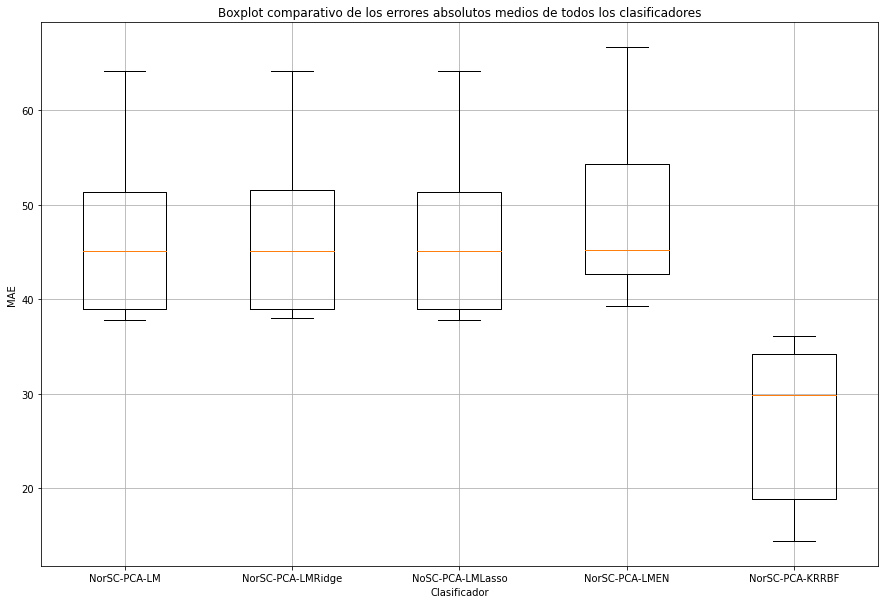

In [28]:
#Comparacion de los errores medios absolutos de todos los clasificadores
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
plt.boxplot(maev)
plt.xticks(ticks=np.arange(len(steps))+1,labels=label_model)
plt.xlabel("Clasificador")
plt.ylabel("MAE")
plt.title("Boxplot comparativo de los errores absolutos medios de todos los clasificadores")
plt.grid()
plt.show()

En el grafico anterior se presenta la comparacion del error absoluto medio de todos los modelos probados en un diagrama de caja y bigotes (BoxPlot). Los modelos que fueron probados son los siguientes:
  * NorSC-PCA-LM: Modelo de regresion lineal simple con normalizado y PCA.

  * NorSC-PCA-LMRidge: Modelo de regresion lineal rigido con normalizado y PCA.

  * NorSC-PCA-LMLasso: Modelo de regresion lineal tipo Lasso con normalizado y PCA.

  * NorSC-PCA-LMEN: Modelo de regresion lineal ElasticNet con normalizado y PCA.

  * NorSC-KRRBF: Modelo de regresion KernelRidge de mapeo rbf con normalizado y PCA.


Del grafico podemos concluir que lo que GridSerch nos ha dicho anteriormente es cierto, el mejor modelo (con error medio absoluto mas bajo) para seguir nuestros datos es el KernelRigde-rbf.

  



Extrayendo el mejor modelo podriamos predecir los contagiados de el dia siguiente de la siguiente forma

In [48]:
# Predicion de contagiados al dia siguiente con el mejor modelo
best_model = grid_search.best_estimator_

y23abr = best_model.predict(np.array(X[-1]).reshape(1,-1))
y23abr

array([[4557.86007426]])

y podriamos compararlo con los datos de contagiados que tenemos de los ultimos 5 dias

In [51]:
#Contagiados de los ultimos 5 dias
X[-1]

array([3439, 3439, 3792, 3977, 4149], dtype=object)

Con esto podemos concluir que nuestro modelo esta prediciendo aproximadamente unos 409 contagiados nuevos al dia siguiente:
* 409 = 4558 - 4149

#### Tambien podemos ver de manera grafica que tanto se ajustan las predicciones del modelo a los datos originales

In [0]:
#Evalualndo el ajuste de los datos
y_pred = best_model.predict(X)

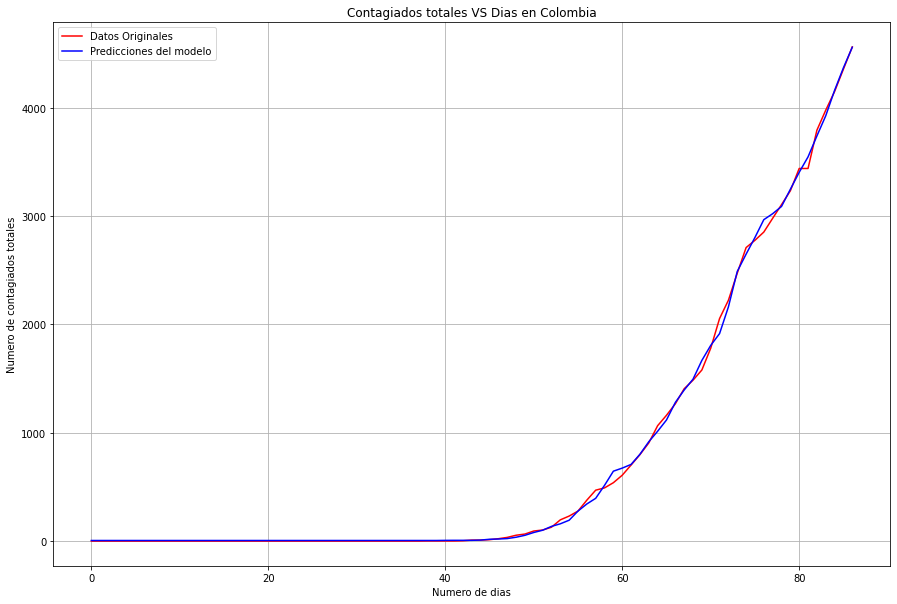

In [47]:
lab=["Datos Originales", "Predicciones del modelo"]
plt.plot(y,'r')
plt.plot(y_pred,'b')
plt.legend(labels=lab)
plt.xlabel("Numero de dias")
plt.ylabel("Numero de contagiados totales")
plt.title("Contagiados totales VS Dias en Colombia")
plt.grid()